<a href="https://colab.research.google.com/github/shashikidambi/BeyondEpochs-AI-Research/blob/main/Research_Papers/Classic%20/AlexNext_2012/AlexNet_SK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AlexNet implementation using keras
In this notebook we will build AlexNet model from the scratch using keras.

Link to the AlexNet Paper: http://www.cs.toronto.edu/~kriz/imagenet_classification_with_deep_convolutional.pdf

AlexNet was proposed by Krizhevsky et al. in the year 2012.

The architecture contain five convolutional layers, max-pooling layers, three fully connected layers and finally a softmax function.

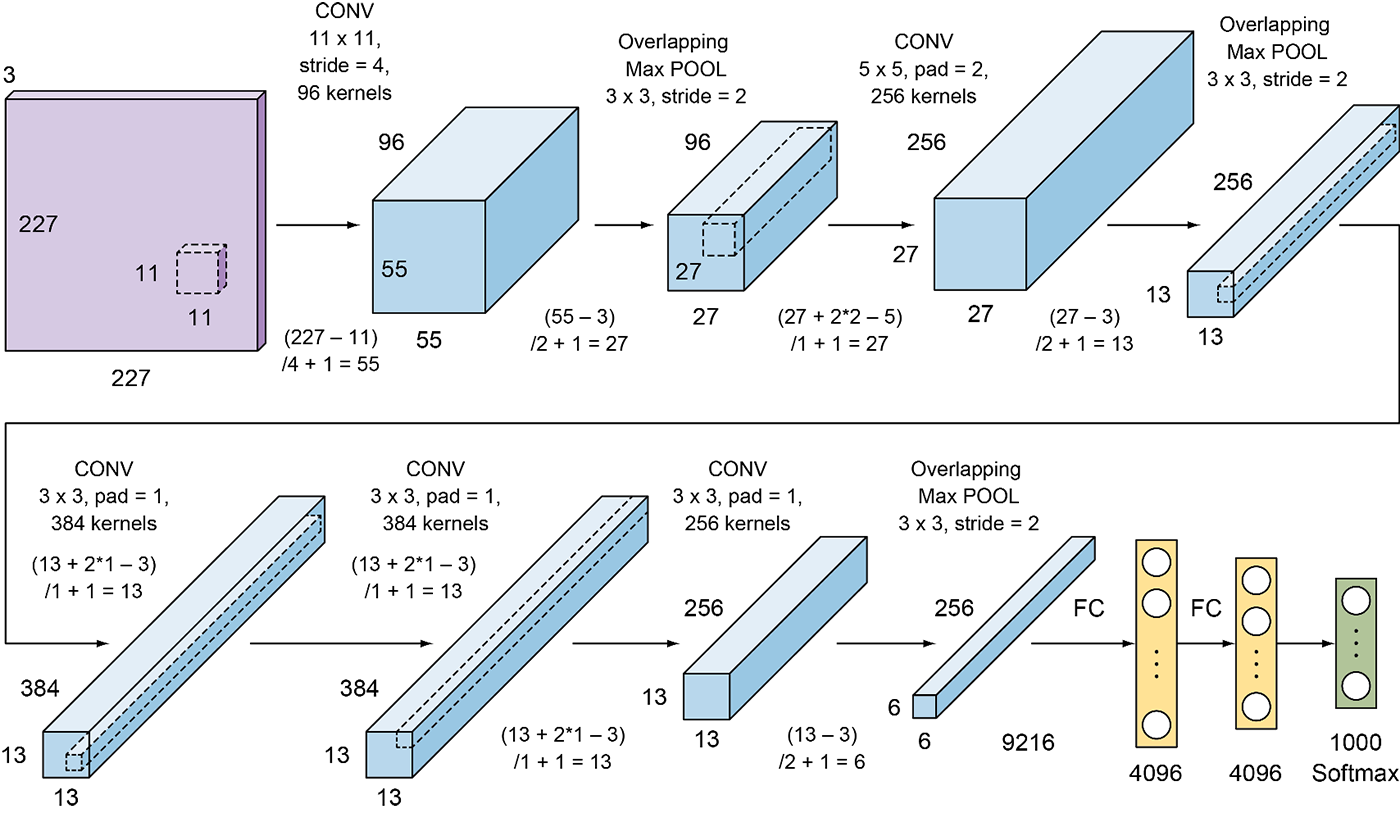

Features of AlexNet

**1. Introducing ReLU Activation function**
> * ReLu was used in the hidden layers
> * ReLu converges faster this is because the derivative of the sigmoid function becomes very small in the saturating region and hence the updates applied to the weights almost vanish. This phenomenon is called **Vanishing gradient problem**
> * ReLu represented as $f(x) = max(0, x)$

* To understand ***vanishing gradient problem***: A large change in the input of the sigmoid function causes a negligible change in the output

**2. Dropout layer**
> * Dropout layers are used to prevent the neural network from the overfitting.
> * The neurons that are ***dropped out*** will not be used during forward and backward propagation.
> * This means eac time an input is fed, the neural network samples a different architecture, but all these share same weights. This technique reduces complex co-adaptions of other neurons.
> * Hence neuron is forced to learn more robust features that are useful in conjunction with many different random subsets of the other neurons.
> * Authors have used dropout with the probability of 0.5 in the two fully connected layers.

**3. Data augmentation**
> * Data augmentation is a key technique to avoid the overfitting of the data
> * Generated synthetic data using label-preserving transformations.
> * Data augmentation technique involves ***Rotation***, ***flipping***, ***Translation***, ***scaling***, ***De-texturized***, ***De-coloring***, ***Edge enhanced***, ***Salient edge map***

**4. Local response normalization**
> * details please refer: https://prateekvjoshi.com/2016/04/05/what-is-local-response-normalization-in-convolutional-neural-networks/

**5. Weight regularization**
> * The authors have used a weight decay of 0.0005.

> * Similar to the **L2 regularization**

>> L2 regularization is that it penalizes the error function by adding a regularization term. This in turn reduces the weight values of the hidden units and makes them too small.

>>Regularization procedure:
>>>* First we update the error function by adding regularization term

>>>>>Error function = $Error function_{old}$ + Regularization term

>>>>>*Error function can be MSE or Cross-entropy*

>>>* Regularization term
>>>>> L2 regularization term = $\frac{\lambda}{2m}\times \sum \left \| w \right \|^2$

>>>>> where lambda $lambda(\lambda)$ is the regularization parameter, $m$ is the number of instances, and $w$ is the weight.

>>>* Updated regularization term
>>>>>Error function = $Error function_{old}$ + $\frac{\lambda}{2m}\times \sum \left \| w \right \|^2$

**6. Training on Multiple GPU's**

>* The authors have used GTX580 GPU with 3GB of memory but the memory and computation was not enough to train 1.2 million training examples in the dataset. Therefore team developed a complicated way to spread the network across two GPU's



------------------------------------------------------------------------------------





* **Number of filters in each convolutional layer**

>>Depth (Number of filters)

>>Conv 1 - 6

>>Conv 3 - 16

>>Conv 5 - 120

* **The authors have used different kernel_sizes 11 x 11, 5 x 5, and 3 x 3**

* **Max-pooling layers**

>>The **pool size is 3 x 3**, added in middle of the each convolutional layers.

>>*The authors have used **max-pooling**, which computes the maximum value of its inputs.*

* **Activation function**: The creators have used **ReLu** activation function for the hidden layers. Since ReLu has showed faster during training when used in between the hidden layers*

>>$f(x) = max(0, x)$


Summary of the layers stacked toghether are as follows

* Conv1--> Kernel size = 11 x 11, depth = 96, and stride = 4

* Conv2-->Kernel size = 5, depth = 256, and stride = 1

* Pool-->3 x 3, which downsamples its input dimensions from 27 x 27 to 13 x 13

* Conv3-->Kernel size = 3, depth = 384, and stride = 1

* Conv4-->Kernel size = 3, depth = 384, and stride = 1

* Conv5-->Kernel size = 3, depth = 256, and stride = 1

* Pool-->Size = 3 x 3, downsamples its input from 13 x 13 to 6 x 6

* Flatten layer-->Flattens the dimensions volume 6 x 6 x 256 to 1 x 9216 (i.e 6 x 6 x 256 = 9216)

* FC with 4096 neurons

* FC with 4096 neurons

* Softmax layer with 1000 neurons







formula to calculate the layer dimensions

$N_{out} = {\frac{[n_{in} + 2p - k]}{s}} + 1$

Example

* **Conv layer 1**

> * Input image size 227 x 227 x 3
> * Kernel size 11 x 11
> * Stride 4 (Shrinks input dimensions roughly by a factor of 4)
> * Depth 96


>>$Conv 1 = {\frac{[227 + (2\times 0) - 11]}{4}} + 1$ = $55$

> * Depth is the number of filters in the conv layer is 96 hence the output dimensions are 55 x 55 x 96

* Pooling - Max- pooling of (3, 3) result

>>$Pool = {\frac{[55 + (2 \times 0) - 3]}{2}} + 1$ = $27$
>>The pooling layer does not change the depth of the volume. The output dimensions are 27 x 27 x 96

* **Conv layer 2**
> * Kernel size 5 x 5

> * Stride 1

> * Depth 256

> > $Conv 2 = {\frac{[27 + (2 \times 2) - 5]}{1}} + 1$ = $27$

>>> * Depth is the number of filters in the conv layer is 256 hence the output dimensions are 27 x 27 x 256

* **Pooling** - Max- pooling of (3, 3) result

>>$Pool = {\frac{[27 + (2 \times 0) - 3]}{2}} + 1$ = $13$

>>Since the pooling layer does not change the depth of the volume. The output dimensions are 13 x 13 x 256

* **Conv layer 3**

> * Kernel size 3 x 3

> * Stride 1

> * Depth 384

> > $Conv 3 = {\frac{[13 + (2 \times 1) - 3]}{1}} + 1$ = $13$

>>> * Depth is the number of filters in the conv layer is 384 hence the output dimensions are 13 x 13 x 384

* **Conv layer 4**

> * Kernel size 3 x 3

> * Stride 1

> * Depth 384

> > $Conv 4 = {\frac{[13 + (2 \times 1) - 3]}{1}} + 1$ = $13$

>>> * Depth is the number of filters in the conv layer is 384 hence the output dimensions are 13 x 13 x 384

* **Conv layer 5**

> * Kernel size 3 x 3

> * Stride 1

> * Depth 256

> > $Conv 5 = {\frac{[13 + (2 \times 1) - 3]}{1}} + 1$ = $13$

>>> * Depth is the number of filters in the conv layer is 384 hence the output dimensions are 13 x 13 x 256

* **Pooling** - Max- pooling of (3, 3) result

>>$Pool = {\frac{[13 + (2 \times 0) - 3]}{2}} + 1$ = $6$

>>Since the pooling layer does not change the depth of the volume. The output dimensions are 6 x 6 x 256

* **Flatten layer** - Flattens the dimensions volume 6 x 6 x 256 to 1 x 9216

* FC with 4096 neurons

* FC with 4096 neurons

* Softmax layer with 1000 neurons







In [2]:
# Importing Libraries needed
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow import keras

The Dataset - we will use the The CIFAR-10 dataset that is a widely-used collection of 60,000 small (32x32 pixel), color (RGB) images, divided into 10 distinct object categories like airplanes, cars, birds, cats, dogs, etc., with 50,000 images for training models and 10,000 for testing their performance in image classification tasks. It serves as a standard benchmark for evaluating deep learning algorithms, particularly Convolutional Neural Networks (CNNs), due to its manageable size and real-world complexity.



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


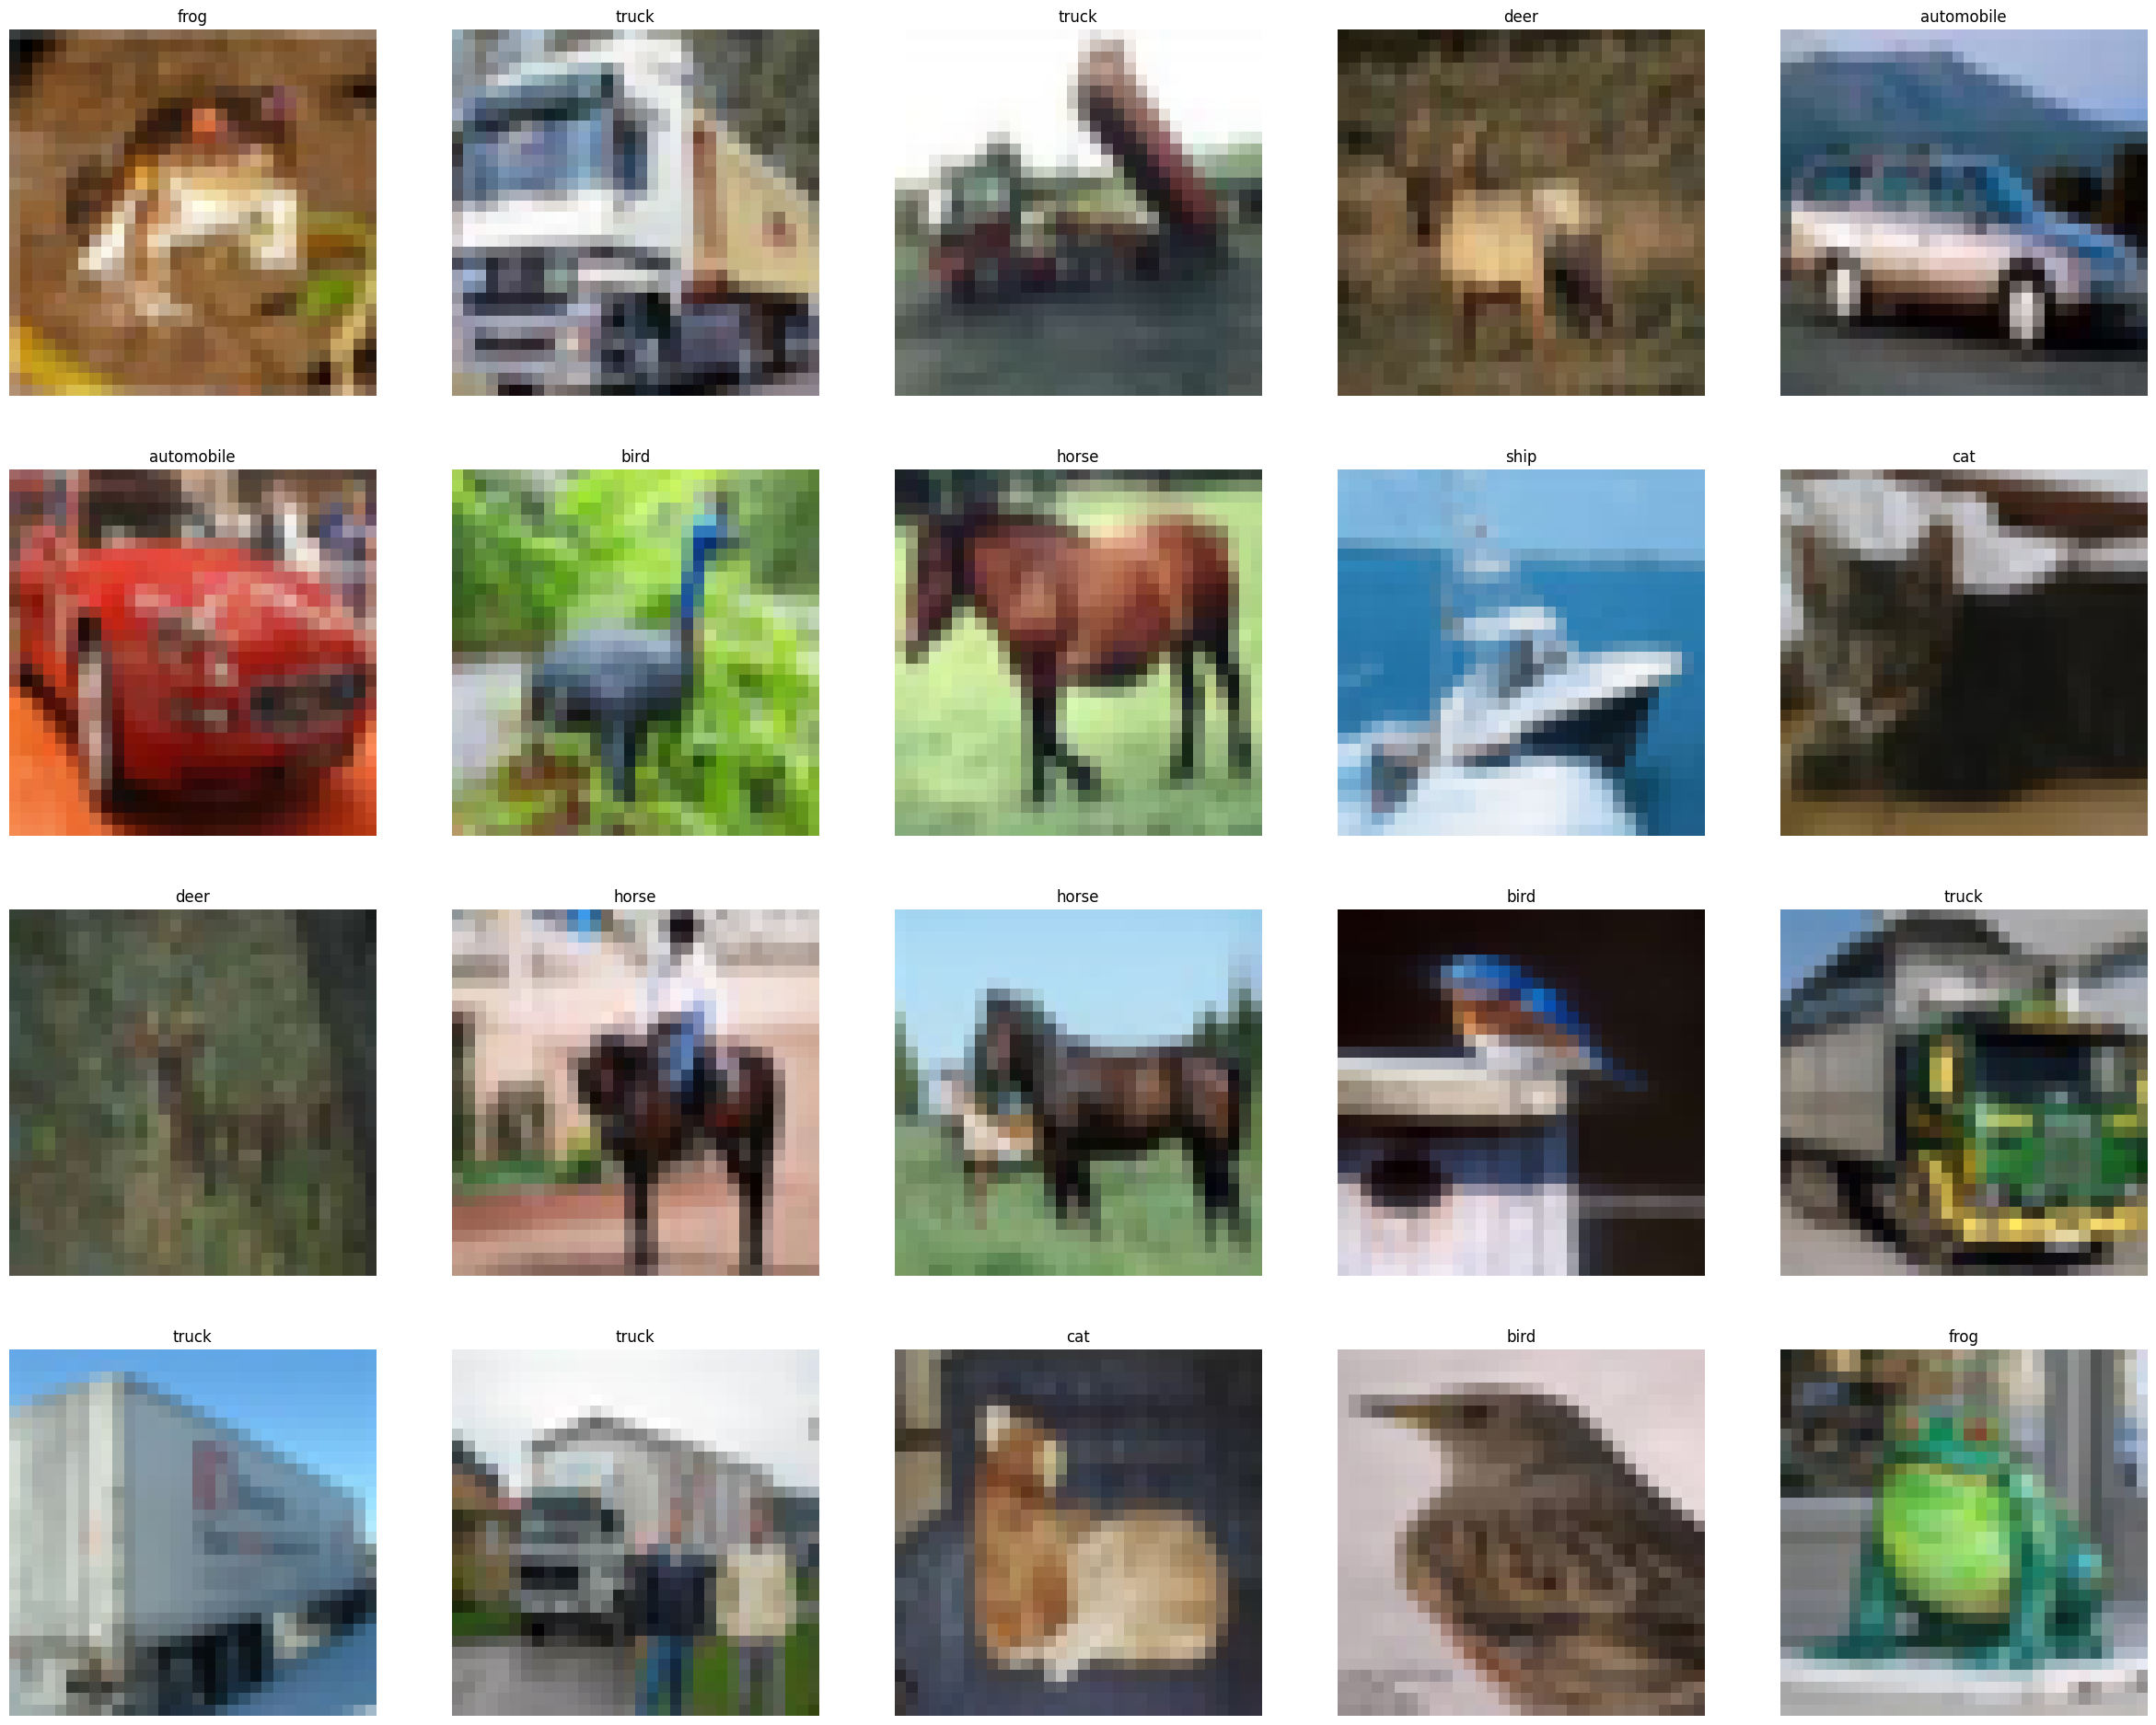

In [3]:
# Laod the Cifar dataset and dispalying a sample set of images
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
train_ds=tf.data.Dataset.from_tensor_slices((x_train,y_train))
test_ds=tf.data.Dataset.from_tensor_slices((x_test,y_test))
plt.figure(figsize=(30,30))
for i,(image,label) in enumerate(train_ds.take(20)):
    #print(label)
    ax=plt.subplot(5,5,i+1)
    plt.imshow(image)
    plt.title(CLASS_NAMES[label.numpy()[0]])
    plt.axis('off')

In [4]:
# Normalizing the pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape y_train and y_test to be 1D before one-hot encoding
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
# Build the model with 5 Convolutional Layers and 2 fully connected layers - similar to AlexNet
# Use Relu for activation and softmax for the final output
model = Sequential()

# Layer 1
model.add(Conv2D(96, kernel_size=(3,3), strides=(1,1), input_shape=(32,32,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())

# Layer 2
model.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())

# Layer 3
model.add(Conv2D(384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# Layer 4
model.add(Conv2D(384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# Layer 5
model.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Flatten
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Fully Connected Layer 2
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 96)     │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 256)    │       221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 8, 8, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 8, 8, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 10)             │             

 Total params: 8,048,394 (30.70 MB)

 Trainable params: 8,047,690 (30.70 MB)

 Non-trainable params: 704 (2.75 KB)

In [6]:
# Model compilation
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
# Model training
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=15,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 77ms/step - accuracy: 0.3147 - loss: 1.8846 - val_accuracy: 0.1040 - val_loss: 4.7799
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.5621 - loss: 1.2278 - val_accuracy: 0.2936 - val_loss: 2.6649
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.6538 - loss: 1.0028 - val_accuracy: 0.5762 - val_loss: 1.3488
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.7202 - loss: 0.8214 - val_accuracy: 0.7006 - val_loss: 0.8574
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.7581 - loss: 0.7003 - val_accuracy: 0.6806 - val_loss: 0.9777
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.7970 - loss: 0.5953 - val_accuracy: 0.6936 - val_loss: 0.9170
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.8237 - loss: 0.5101 - val_accuracy: 0.7325 - val_loss: 0.7859
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.8586 - loss: 0.4219 - 

In [8]:
# Review the Model Accuracy
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.7307


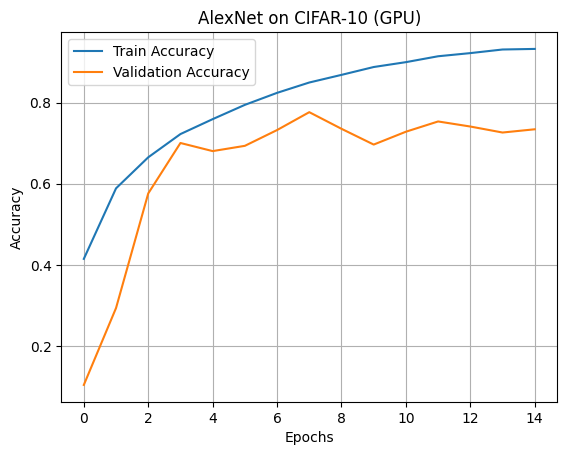

In [9]:
# Plat the Model Accuracy (Train and Validation)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('AlexNet on CIFAR-10 (GPU)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 898ms/step


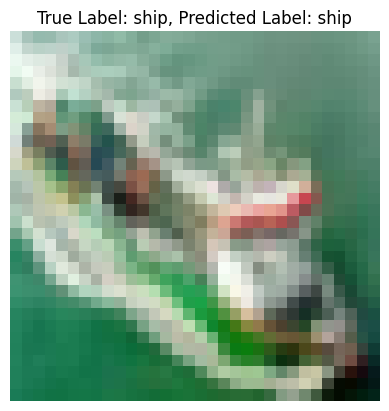

In [10]:
#Testing the prediction with a sample image
import numpy as np

# Select a sample image from the test set
sample_index = 15  # You can change this index to test different images
sample_image = x_test[sample_index]
sample_label = y_test[sample_index]

# The model expects a batch of images, so we add an extra dimension
# (1, 32, 32, 3) for a single image
processed_image = np.expand_dims(sample_image, axis=0)

# Make a prediction
predictions = model.predict(processed_image)

# Get the predicted class index
predicted_class_index = np.argmax(predictions[0])
predicted_class_name = CLASS_NAMES[predicted_class_index]

# Get the true class name
true_class_index = np.argmax(sample_label)
true_class_name = CLASS_NAMES[true_class_index]

# Display the image and prediction
plt.imshow(sample_image)
plt.title(f"True Label: {true_class_name}, Predicted Label: {predicted_class_name}")
plt.axis('off')
plt.show()